In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st


In [2]:
data_path = 'Resources/application_data_cleaned_v1.csv'

In [3]:
project_data = pd.read_csv(data_path)

In [4]:
project_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        8
AMT_GOODS_PRICE                  163
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                62316
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
ORGANIZATION_TYPE                  0
d

In [5]:
project_data.dropna(axis=0, inplace=True)

In [6]:
project_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
ORGANIZATION_TYPE              0
dtype: int64

In [7]:
project_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,...,1,1,0,1,1,0,Laborers,2,2,Business Entity Type 3
1,100031,1,Cash loans,F,N,Y,112500.0,979992.0,27076.5,702000.0,...,1,1,0,1,0,0,Cooking staff,3,2,Business Entity Type 3
2,100047,1,Cash loans,M,N,Y,202500.0,1193580.0,35028.0,855000.0,...,1,1,0,1,0,0,Laborers,2,2,Business Entity Type 3
3,100049,1,Cash loans,F,N,N,135000.0,288873.0,16258.5,238500.0,...,1,1,1,1,1,0,Sales staff,3,3,Self-employed
6,100130,1,Cash loans,F,N,Y,157500.0,723996.0,30802.5,585000.0,...,1,1,0,1,1,0,Sales staff,2,2,Trade: type 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199993,321050,0,Cash loans,M,Y,Y,675000.0,473760.0,49878.0,450000.0,...,1,1,0,1,0,0,Laborers,2,2,Construction
199994,321052,0,Cash loans,M,Y,Y,450000.0,1002870.0,42619.5,922500.0,...,1,1,0,1,0,0,Managers,2,2,Construction
199995,321053,0,Revolving loans,M,Y,Y,450000.0,1350000.0,67500.0,1350000.0,...,1,1,0,1,0,0,Managers,1,1,Business Entity Type 3
199996,321054,0,Cash loans,F,N,Y,202500.0,331920.0,18135.0,225000.0,...,1,1,0,1,0,0,Core staff,2,2,School


In [8]:
jobs = project_data.groupby(['OCCUPATION_TYPE'], as_index=False)['SK_ID_CURR'].count()
jobs

,OCCUPATION_TYPE,SK_ID_CURR
0,Accountants,6301
1,Cleaning staff,3009
2,Cooking staff,3928
3,Core staff,17727
4,Drivers,12358
5,HR staff,364
6,High skill tech staff,7250
7,IT staff,332
8,Laborers,36355
9,Low-skill Laborers,1429


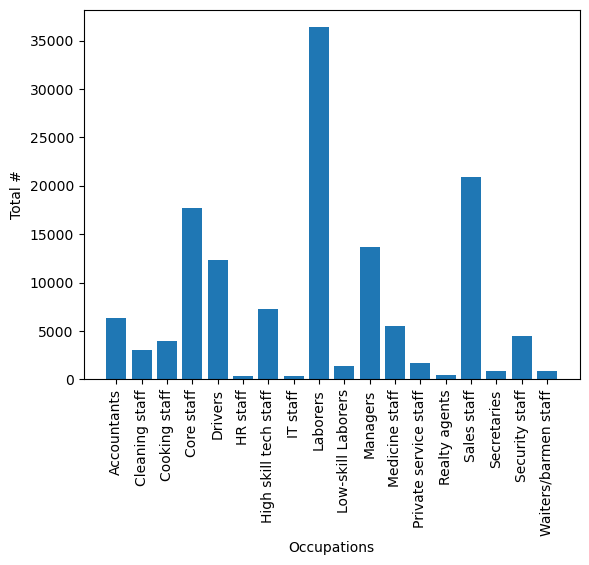

<Figure size 640x480 with 0 Axes>

In [9]:
plt.bar(jobs['OCCUPATION_TYPE'], jobs['SK_ID_CURR'])
plt.xticks(rotation="vertical")
plt.xlabel("Occupations")
plt.ylabel("Total #")
plt.show()

plt.savefig("output_data\Occupations-Dist-Overall")

In [10]:
project_data.groupby(['TARGET'], as_index=False)['OCCUPATION_TYPE'].count()


,TARGET,OCCUPATION_TYPE
0,0,119011
1,1,18530


In [11]:
credit_card_defaulter = project_data[project_data['TARGET'] == 1]
credit_card_defaulter

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,...,1,1,0,1,1,0,Laborers,2,2,Business Entity Type 3
1,100031,1,Cash loans,F,N,Y,112500.0,979992.0,27076.5,702000.0,...,1,1,0,1,0,0,Cooking staff,3,2,Business Entity Type 3
2,100047,1,Cash loans,M,N,Y,202500.0,1193580.0,35028.0,855000.0,...,1,1,0,1,0,0,Laborers,2,2,Business Entity Type 3
3,100049,1,Cash loans,F,N,N,135000.0,288873.0,16258.5,238500.0,...,1,1,1,1,1,0,Sales staff,3,3,Self-employed
6,100130,1,Cash loans,F,N,Y,157500.0,723996.0,30802.5,585000.0,...,1,1,0,1,1,0,Sales staff,2,2,Trade: type 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24820,456186,1,Cash loans,M,N,N,207000.0,450000.0,32746.5,450000.0,...,1,1,1,1,0,0,Laborers,3,3,Business Entity Type 3
24821,456215,1,Cash loans,F,N,N,144000.0,1303200.0,46809.0,1125000.0,...,1,1,1,1,0,0,Laborers,2,2,Construction
24822,456225,1,Cash loans,M,N,Y,225000.0,297000.0,19975.5,297000.0,...,1,1,0,1,1,0,Managers,2,2,Business Entity Type 3
24823,456233,1,Cash loans,F,N,Y,225000.0,521280.0,23089.5,450000.0,...,1,1,0,1,0,0,Sales staff,2,2,Business Entity Type 3


In [12]:
default_jobs = credit_card_defaulter.groupby(['OCCUPATION_TYPE'], as_index=False)['SK_ID_CURR'].count()

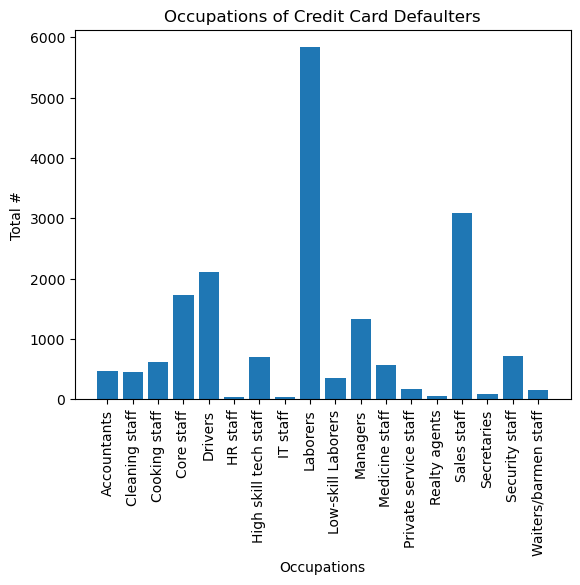

<Figure size 640x480 with 0 Axes>

In [13]:
plt.bar(default_jobs['OCCUPATION_TYPE'], default_jobs['SK_ID_CURR'])
plt.xticks(rotation="vertical")
plt.xlabel("Occupations")
plt.ylabel("Total #")
plt.title("Occupations of Credit Card Defaulters")
plt.show()
plt.savefig("output_data\OccupationsDist-Defaulters")

In [14]:
non_defaulter = project_data[project_data['TARGET'] == 0]
non_defaulter

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
24825,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,...,1,1,0,1,1,0,Core staff,1,1,School
24826,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,...,1,1,1,1,1,0,Laborers,2,2,Government
24827,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,...,1,1,0,1,0,0,Laborers,2,2,Business Entity Type 3
24828,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,513000.0,...,1,1,0,1,0,0,Core staff,2,2,Religion
24829,100008,0,Cash loans,M,N,Y,99000.0,490495.5,27517.5,454500.0,...,1,1,1,1,1,0,Laborers,2,2,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199993,321050,0,Cash loans,M,Y,Y,675000.0,473760.0,49878.0,450000.0,...,1,1,0,1,0,0,Laborers,2,2,Construction
199994,321052,0,Cash loans,M,Y,Y,450000.0,1002870.0,42619.5,922500.0,...,1,1,0,1,0,0,Managers,2,2,Construction
199995,321053,0,Revolving loans,M,Y,Y,450000.0,1350000.0,67500.0,1350000.0,...,1,1,0,1,0,0,Managers,1,1,Business Entity Type 3
199996,321054,0,Cash loans,F,N,Y,202500.0,331920.0,18135.0,225000.0,...,1,1,0,1,0,0,Core staff,2,2,School


In [15]:
non_default_jobs = non_defaulter.groupby(['OCCUPATION_TYPE'], as_index=False)['SK_ID_CURR'].count()

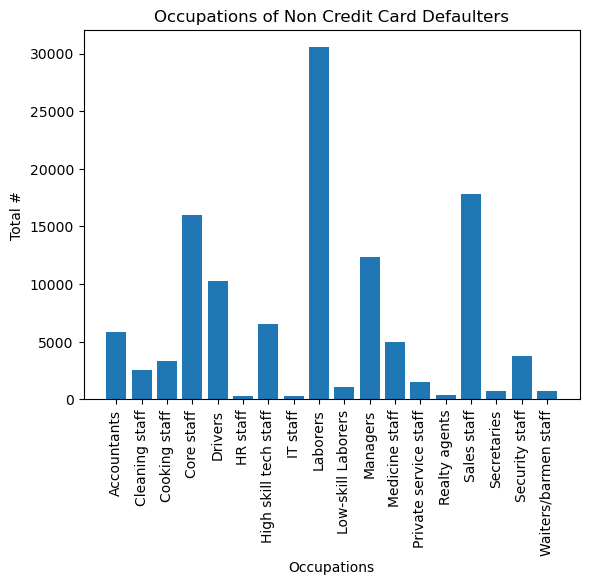

<Figure size 640x480 with 0 Axes>

In [21]:
plt.bar(non_default_jobs['OCCUPATION_TYPE'], non_default_jobs['SK_ID_CURR'])
plt.xticks(rotation="vertical")
plt.xlabel("Occupations")
plt.ylabel("Total #")
plt.title("Occupations of Non Credit Card Defaulters")
plt.show()
plt.savefig("output_data\OccupationsDist-NonDefaulters")

In [17]:
loans = credit_card_defaulter.groupby(['NAME_CONTRACT_TYPE'], as_index = False)['OCCUPATION_TYPE'].count()

In [18]:
loans1 = non_defaulter.groupby(['NAME_CONTRACT_TYPE'], as_index = False)['OCCUPATION_TYPE'].count()

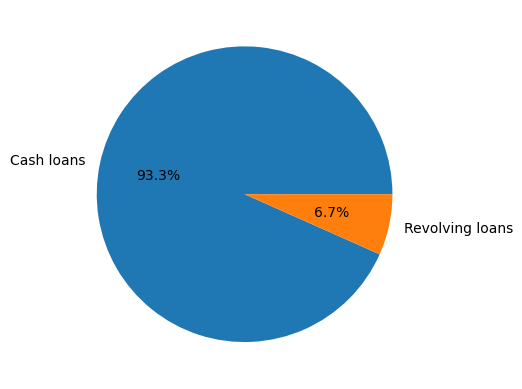

In [19]:
plt.pie(loans['OCCUPATION_TYPE'],  autopct="%1.1f%%", labels=(loans['NAME_CONTRACT_TYPE']))
plt.savefig("output_data\Loans-Defaulters")

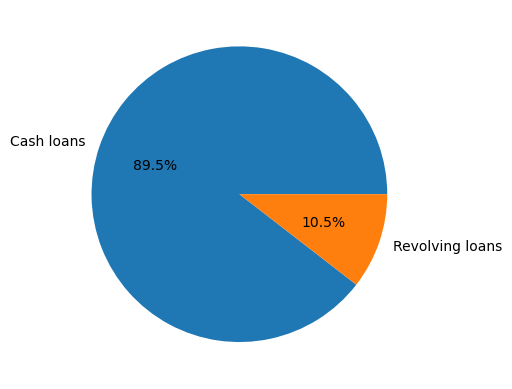

In [20]:
plt.pie(loans1['OCCUPATION_TYPE'],  autopct="%1.1f%%", labels=(loans1['NAME_CONTRACT_TYPE']))
plt.savefig("output_data\Loans-NonDefaulters")